In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
accounts = pd.read_csv("accounts.csv") 
transactions = pd.read_csv("transactions.csv") 

In [24]:
accounts.dtypes

id_bank_account      int64
max_date            object
balance            float64
dtype: object

In [25]:
transactions.dtypes

id_bank_account      int64
date                object
amount             float64
category_l1         object
category_l2         object
dtype: object

In [26]:
# Convert the Date column to a datetime data type
transactions['date'] = pd.to_datetime(transactions['date'])
accounts['max_date'] = pd.to_datetime(accounts['max_date'])

In [27]:
transactions['category_l1'].unique()

array(['loan', nan, 'unindentifiedPayments', 'interPersonalTransfer',
       'brands', 'ATM', 'smallShops', 'telecom', 'personalTransfer',
       'incomes', 'energy', 'water', 'insurance', 'bankFees', 'savings',
       'gambling', 'taxes', 'overdraft', 'loanSuspicion', 'rejection',
       'rent', 'alimony', 'videoGames', 'fraud'], dtype=object)

In [28]:
transactions['category_l2'].unique()

array(['consumerCredit', nan, 'thirdParty', 'retail', 'hotel', 'check',
       'fastFood', 'Potentiel', 'IT', 'transport', 'cashDeposit', 'food',
       'servicePack', 'supermarket', 'Compte rémunéré', 'parking',
       'restaurant', 'CAF', 'videoStreaming', 'doctor', 'CPAM', 'Salaire',
       'Placement', 'mobile', 'sepaTransferFees ', 'Inconnu',
       'accountManagementFees', 'personInsurance', 'savings',
       'overdraftInterestReimbursement', 'barTobaccoPress', 'carWorkshop',
       'overdraftInterest', 'clothes', 'magazine', 'intervention',
       'propertyInsurance', 'splitPayment', 'pharmacy',
       'rejectionFeesReimbursement', 'Chômage', 'Livret A',
       'creditCardFees', 'musicStreaming', 'cardPaymentOutsideEU',
       'Assurance vie', 'creditCard', 'bailiff', 'rejectionFees',
       'mortgage', 'cinema', 'Taxe sur les transactions financières',
       'Timbre fiscal', 'microCredit', 'bookshop', 'Revenus', 'Loyers',
       'internet', 'Amende', 'Professionnel', 'withdraw

<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "défaut de paiement"  </em> </strong> 

In [97]:
import datetime
def detect_defaut_paiement(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        default=transactions_compte[
        (transactions_compte["category_l1"]=="rejection")&
        (max(transactions_compte["date"]) - transactions_compte["date"] < datetime.timedelta(365))
    ]
    except:
        return -1
    nb_rejet=len(default)  
    if nb_rejet>=3:
        return 1
        
    return 0

In [98]:
defauts =[detect_defaut_paiement(compte) for compte in accounts['id_bank_account'] ]
accounts["Defaut_paiement"]=defauts

In [99]:
# Count the occurrences of each status
status_counts = accounts["Defaut_paiement"].value_counts()

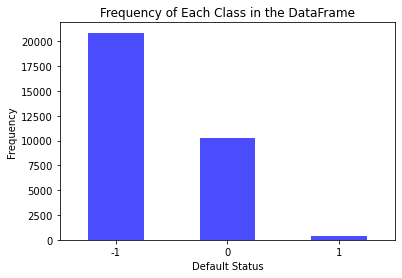

In [100]:
import matplotlib.pyplot as plt

# Plotting the counts
status_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Default Status')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in the DataFrame')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical for readability
plt.show()

In [130]:
accounts[accounts["Defaut_paiement"]==1]

,id_bank_account,max_date,balance,Defaut_paiement
60,1983,2023-05-18 22:00:00,535.85,1
118,2181,2023-08-21 22:00:00,-135.55,1
150,2259,2022-05-19 22:00:00,-6527.13,1
151,2260,2022-05-23 22:00:00,-822.43,1
157,2268,2022-05-23 22:00:00,-822.43,1
...,...,...,...,...
31153,69543,2024-02-29 23:00:00,-506.23,1
31154,69544,2024-02-28 23:00:00,-12.90,1
31168,69559,2024-02-26 23:00:00,286.00,1
31207,69608,2024-02-29 23:00:00,571.04,1


<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "nbre de rejection passée les 3 mois précédents"  </em> </strong> 

In [137]:
def past_rejection(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        df=transactions_compte[
            (transactions_compte['date']>(max(transactions_compte['date'])- datetime.timedelta(90)))]
    except:
        return 0
        
    return len(df[df['category_l1']=='rejection'])
       

In [138]:
n_rejet =[past_rejection(compte) for compte in accounts['id_bank_account'] ]
accounts["n_rejection"]=n_rejet

<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "Le montant total de rejection passée les 3 mois précédents"  </em> </strong> 

In [139]:
def total_amount_rejection(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        df=transactions_compte[
            (transactions_compte['date']>(max(transactions_compte['date'])- datetime.timedelta(90)))]
    except:
        return 0
        
    return sum(df[df['category_l1']=='rejection']['amount'])
       

In [140]:
sum_rejet =[total_amount_rejection(compte) for compte in accounts['id_bank_account'] ]
accounts["sum_rejection"]=sum_rejet

<code style="background:LightBlue;color:white"> <strong><em> Création de la variable "Temps écoulé depuis la dernière rejection"  </em> </strong> 

In [142]:
def temps_rejection(compte):
    transactions_compte = transactions[transactions['id_bank_account'] == compte]
    try:
        df=transactions_compte[transactions_compte["category_l1"]=="rejection"]
        return max(transactions_compte['date'])-max(df['date'])
    except:
        return None
        

In [143]:
temps =[temps_rejection(compte) for compte in accounts['id_bank_account'] ]
accounts["Time_last_rejection"]=temps

In [29]:
# Fonction pour vérifier si deux dates ont plus de 12 mois d'écart
def moins_de_12_mois_ecart(date1, date2):
    # Calcul de la différence en mois
    difference_mois = (date2.year - date1.year) * 12 + date2.month - date1.month
    
    # Vérification si la différence est supérieure à 12 mois
    return difference_mois < 12